# Load data

In [1]:
import pandas as pd

In [2]:
#activities
residual_800 = pd.read_csv('../../../160-Stackoverflow-Data/residuals/residuals_800_q.csv')

In [3]:
#questions
x_train_800 = pd.read_csv('../../../160-Stackoverflow-Data/residuals/data/X_train_800.csv')

In [4]:
residual_800.head()

,activity,q_num,rank,score,userid
0,answer,0,0,3.735215,571407
1,comment,0,4036,0.585390,1381767
2,comment,0,0,3.735215,571407
3,comment,0,4,2.580984,1292401
4,comment,0,1888,0.928075,1025201


# Find outliers

In [5]:
import numpy as np

In [6]:
def outliers(li):
    qua1, qua3 = np.percentile(li, [25, 75])
    iqr = qua3 - qua1
    upper_bound = qua3 + (iqr * 1.5)
    li_outlier = [i for i in li if i >= upper_bound]
    return li_outlier

In [7]:
outlier_rank = outliers(list(residual_800['rank']))

In [8]:
#dataframe with outliers
activities_outliers = residual_800[residual_800['rank'].isin(outlier_rank)]

# Questions of these observed outlier ranks

In [9]:
outlier_question = x_train_800[x_train_800.index.isin(activities_outliers.q_num.unique())]

In [10]:
outlier_question.head()

,Unnamed: 0,Unnamed: 0.1,Id,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
7,7,55985,10758806,NaN,NaN,2012-05-25T17:23:02.617,3,462.0,"<p>I have a project ""core"" that is mavenized.\...",1417932.0,NaN,50049.0,Playframework 2.0 with maven and sub-project,java maven playframework sbt subproject,1.0,0,1.0,NaN
13,13,1296,8741054,NaN,8741143.0,2012-01-05T10:37:18.253,0,1732.0,<p>How to resolve warning message coming in ec...,374199.0,NaN,1977903.0,Eclipse Warning message,java eclipse,5.0,6,0.0,NaN
14,14,43834,10314404,NaN,10314451.0,2012-04-25T11:09:04.190,-2,2842.0,<p>I am working on Galaxy Nexus(Android 4.0.3)...,896579.0,NaN,136445.0,How to save captured image to gallery,java android emulation samsung-mobile,2.0,1,NaN,NaN
23,23,68460,11239086,NaN,11239128.0,2012-06-28T06:23:16.197,132,291504.0,<blockquote>\r\r\r\n <p><strong>Possible Dupl...,1439243.0,NaN,-1.0,java.lang.UnsupportedClassVersionError Unsuppo...,java,7.0,0,33.0,2013-02-04T07:29:18.850
24,24,20678,9484820,NaN,NaN,2012-02-28T15:33:14.167,-1,1488.0,<p>I have an html file called basic.html and w...,1178770.0,NaN,1400768.0,Regex - find various strings from an HTML file,java html regex,2.0,4,NaN,2014-09-27T14:44:12.220


In [11]:
y_train = pd.read_csv('../../../160-Stackoverflow-Data/residuals/data/y_train.csv')

In [56]:
file = pd.read_csv('../../../160-Stackoverflow-Data/residuals/feature_matrices/q_0_feature_matrix.csv', header=None)

# map activity for feature matrix (question number)

In [12]:
def map_activity(file_name):
    """ Modify Feature Matrix (Ranks of users for each question) to add activities.
    
    Argument: file_name (int) - the question number
    
    Return: pd.dataframe - the modified feature matrix
    """
    
    path = '../../../160-Stackoverflow-Data/residuals/feature_matrices/'\
    + 'q_' + str(file_name) + '_feature_matrix.csv'
    
    que = pd.read_csv(path, header = None)
    user_activity = residual_800[residual_800.q_num == file_name]
    user_activity_dict = {i:j for i, j in zip(user_activity.userid, user_activity.activity)}

    activity_que = []
    for i in que[0]:
        if i in user_activity_dict.keys():
            activity_que.append(user_activity_dict.get(i))
        else:
            activity_que.append('no_act')
    que['activity'] = activity_que
    
    que.sort_values(4)
    que['rank'] = que.index
    return que

In [60]:
map_activity(0).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,activity,rank
0,571407.0,0.057845,1.000000,0.383799,0.000000,1.000000,0.290600,0.000000,0.491131,0.000000,0.000000,0.511840,3.735215,comment,0
1,418556.0,0.056322,0.584564,1.000000,0.009709,0.823162,1.000000,0.009365,0.096544,0.004086,0.000000,0.087583,3.671334,no_act,1
2,892029.0,0.000000,0.006040,0.027965,1.000000,0.006517,0.027477,1.000000,0.482462,0.227725,0.170854,0.162565,3.111606,no_act,2
3,57695.0,0.103571,0.943624,0.327547,0.009709,0.859432,0.206922,0.009468,0.184499,0.131908,0.000000,0.154127,2.930809,no_act,3
4,1292401.0,0.200000,0.001342,0.005143,0.053398,0.000831,0.001826,0.019847,0.000000,0.993322,1.000000,0.305273,2.580984,edit,4


In [69]:
def get_feature_rank(num):
    """ Use function: map_activity to run
    
    Argument: num (int) - question number (feature matrid file)
    
    Return: pd.DataFrame - the dataframe with sorted feature rank
    """
    
    que_no_white = map_activity(num)[map_activity(num).activity != 'no_act']

    q_num = []
    user = []
    feature_score = []
    feature_rank = []
    activity = []
    rank = []

    for i in que_no_white.index:
        users = que_no_white.loc[i][1:12]
        users_dic = {i:j for i, j in zip(users.index, users.values)}
        sorted_dic = sorted(users_dic, key=users_dic.get)
    
        q_num.append(num)
        user.append(que_no_white.loc[i,0])
        feature_score.append(list(que_no_white.loc[i][1:12]))
        feature_rank.append(sorted_dic)
        activity.append(que_no_white.loc[i]['activity'])
        rank.append(que_no_white.loc[i, 'rank'])

    out_dict = {'q_num':q_num, 'user':user, 'feature_score':feature_score,'feature_rank':feature_rank, 'activity':activity, 'rank':rank}
    out_df = pd.DataFrame(out_dict)
    out_df = out_df[['q_num','user','rank', 'feature_score','feature_rank','activity']]
    
    return out_df

In [73]:
#example
get_feature_rank(101)

,q_num,user,rank,feature_score,feature_rank,activity
0,101,571407.0,1,"[0.0, 0.903502501787, 0.329549140448, 0.0, 1.0...","[1, 4, 7, 9, 10, 8, 11, 6, 3, 2, 5]",comment
1,101,537445.0,3,"[1.0, 0.0, 0.000324359390204, 0.0049504950495,...","[2, 5, 6, 7, 8, 11, 3, 4, 9, 10, 1]",favorite
2,101,177800.0,1282,"[0.0224719101124, 0.0636168691923, 0.026921829...","[4, 7, 9, 10, 6, 1, 3, 5, 2, 11, 8]",edit
3,101,422437.0,11455,"[0.0, 0.00500357398142, 0.00129743756082, 0.00...","[1, 9, 6, 3, 7, 4, 2, 5, 11, 10, 8]",favorite


# Feature Score Rank and Frequency 

In [74]:
import time

start = time.time()
que_df = [get_feature_rank(i) for i in range(0,800)]
end = time.time()
print('Run Time:', end-start)

Run Time: 421.18468403816223


In [75]:
feature_rank = pd.concat(que_df)

# Scatter Plot

In [76]:
feature_rank.head()

,q_num,user,rank,feature_score,feature_rank,activity
0,0.0,571407.0,0.0,"[0.0578446909667, 1.0, 0.383799421408, 0.0, 1....","[4, 7, 9, 10, 1, 6, 3, 8, 11, 2, 5]",comment
1,0.0,1292401.0,4.0,"[0.2, 0.00134228187919, 0.00514304082289, 0.05...","[8, 5, 2, 6, 3, 7, 4, 1, 11, 9, 10]",edit
2,0.0,1025201.0,1888.0,"[0.0588235294118, 0.159731543624, 0.0334297653...","[4, 7, 9, 10, 6, 3, 1, 5, 2, 11, 8]",edit
3,0.0,1381767.0,4036.0,"[0.103448275862, 0.0201342281879, 0.0038572806...","[10, 6, 7, 3, 9, 4, 5, 2, 1, 8, 11]",comment
0,1.0,157882.0,34.0,"[0.0, 0.463902787706, 0.187804086928, 0.0, 0.5...","[1, 4, 7, 9, 10, 11, 6, 3, 8, 2, 5]",edit


In [77]:
# split the data based on the t*
under_thres = feature_rank[feature_rank['rank'] < 0.17*max(feature_rank['rank'])]
over_thres = feature_rank[feature_rank['rank'] >= 0.17*max(feature_rank['rank'])]

In [78]:
under_thres.groupby('activity').size()

activity
answer      1085
comment      812
edit         543
favorite     134
dtype: int64

In [79]:
over_thres.groupby('activity').size()

activity
answer      214
comment      68
edit         59
favorite    106
dtype: int64

In [80]:
activities_outliers.activity.value_counts()

answer      188
favorite     94
comment      52
edit         47
Name: activity, dtype: int64

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [97]:
def effects_scores(data,activity):
    """give percentile of rank for each feature
    
    Argument: input data (pd DataFrame) -  the input data
    
    Return: pd.DataFrame - table with percentage 
    """
    f_ranks = data[data['activity'] == activity]['feature_rank']

    ranks = np.array([np.array(xi) for xi in f_ranks])
    df = pd.DataFrame([np.bincount(ranks[:,i]) for i in range(11)]).fillna(0).set_index([['min','2nd','3rd','4th','5th','med','7th','8th',\
                                                                                          '9th','10th','max']])
                                                                             
    df.columns = df.columns.astype(str)
    df = df.drop('0',1).apply(lambda x: x/float(sum(x)))
    return df

In [162]:
def scatter_per(data, suptitle):
    """ input data in a pd dataframe to plot graph, suptitle (str) - graph suptitle
    """
    plt.figure(figsize=(20,5))
    
    for i in range(len(feature_rank.activity.unique())):
        activity = feature_rank.activity.unique()[i]
        df = effects_scores(data,activity) 
        ax = plt.subplot(1,4,i+1)
        inx = df.index
        plt.xticks(range(11), inx)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        for i in range(11):
            values = df.T.iloc[i]
            ax.scatter(values.index, values,  cmap = 'tab20b')
        plt.title(activity, fontsize = 20)
        plt.ylabel('proportion', fontsize=15)
        plt.ylim(0,1)
        plt.grid()
    ax.legend(df.columns,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle(suptitle, fontsize = 25)
    plt.show()

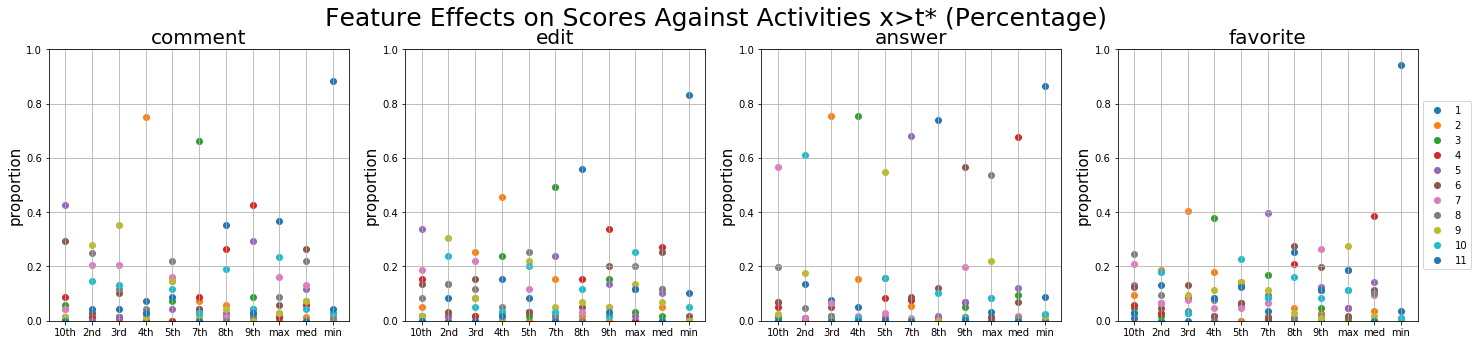

In [161]:
scatter_per(over_thres, 'Feature Effects on Scores Against Activities x>t* (Percentage)')

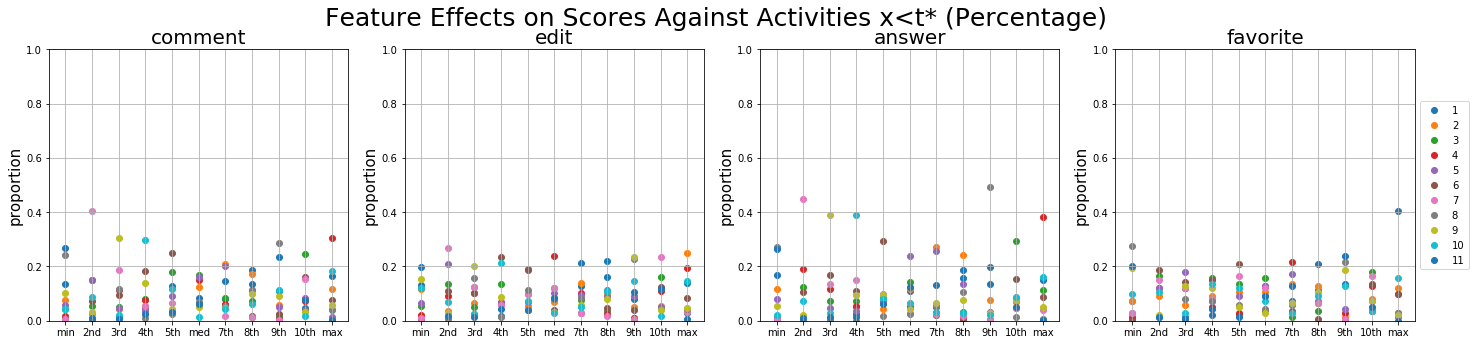

In [159]:
scatter_per(under_thres, 'Feature Effects on Scores Against Activities x<t* (Percentage)')

# Feature Score for Feature 1,2 and 3 for under and above threshold

In [87]:
over_thres.reset_index(inplace=True)
under_thres.reset_index(inplace=True)

In [35]:
f1_score_ot = [i[0] for i in over_thres.feature_score]
f2_score_ot = [i[1] for i in over_thres.feature_score]
f3_score_ot = [i[2] for i in over_thres.feature_score]

f1_score_ut = [i[0] for i in under_thres.feature_score]
f2_score_ut = [i[1] for i in under_thres.feature_score]
f3_score_ut = [i[2] for i in under_thres.feature_score]

In [36]:
from mpl_toolkits.mplot3d import Axes3D

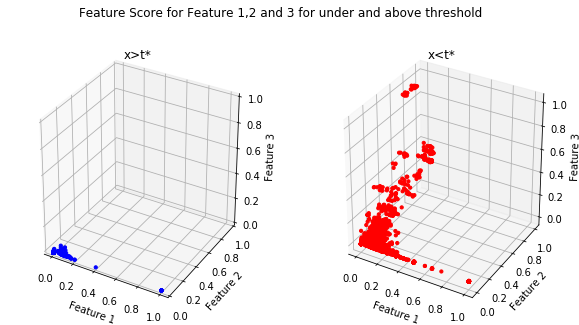

In [144]:
#fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(10,5))

#x<t*
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.scatter(f1_score_ot, f2_score_ot, f3_score_ot, marker="o", color = 'Blue', s = 10, alpha = 1)
ax1.set_ylim(0,1)
ax1.set_zlim(0,1)
ax1.set_title('x>t*')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

#x>t*
ax1 = fig.add_subplot(1, 2, 2, projection = '3d')
ax1.scatter(f1_score_ut, f2_score_ut, f3_score_ut, marker="o", color = 'Red', s = 10, alpha = 1)
ax1.set_title('x<t*')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')

fig.suptitle('Feature Score for Feature 1,2 and 3 for under and above threshold')
plt.show()

# Mean score for features

In [106]:
def feature_mean(feature_num, thres_rank):
    """ calculate mean feature scores for x<t* and x>t*
    
    Argument: feature_num (int) - the feature number, thres_rank (int) - selected threshold
    
    Returns: float - to left mean score, float - to right mean score, float - percentage difference
    """
    left = feature_rank[feature_rank['rank'] <= thres_rank]
    left_score = [i[feature_num - 1] for i in left.feature_score]
    left_mean = np.mean(left_score)

    right = feature_rank[feature_rank['rank'] > thres_rank]
    right_score = [i[feature_num - 1] for i in right.feature_score]
    right_mean = np.mean(right_score)
    
    percent_diff = ((right_mean - left_mean)/left_mean)*100
    
    return left_mean, right_mean, percent_diff

In [238]:
score_right = [[feature_mean(j,i)[1] for i in range(100,int(max(feature_rank['rank'])),100)] for j in range(1,12)]
score_left = [[feature_mean(j,i)[0] for i in range(100,int(max(feature_rank['rank'])),100)] for j in range(1,12)]

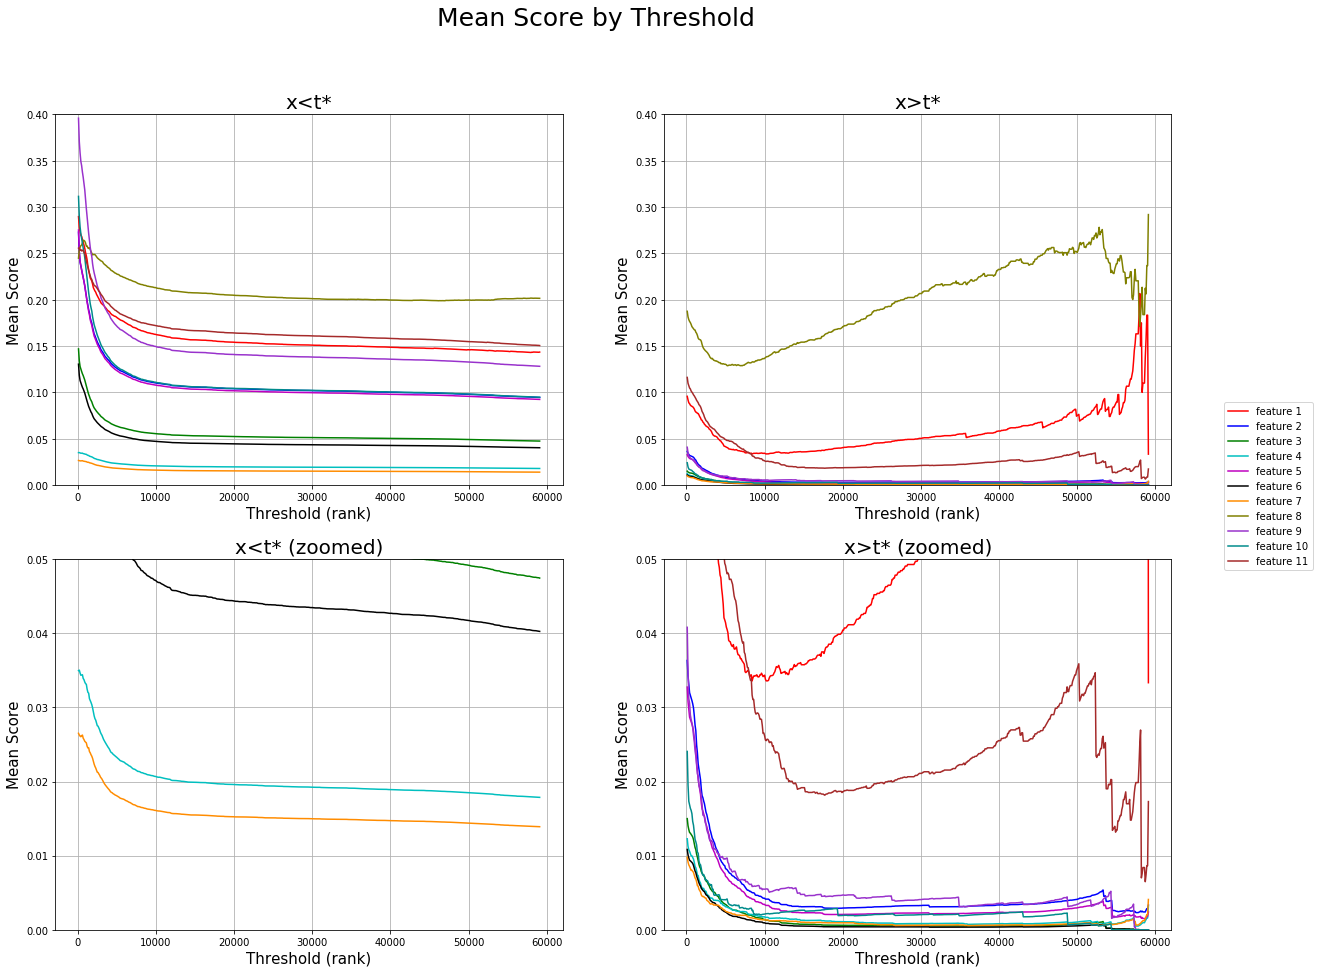

In [310]:
plt.figure(figsize=(20,15))
color = ['r','b','g','c','m','k','darkorange','olive','darkorchid','darkcyan','brown']

plt.subplot(2,2,1)
for i in range(0,11):
    plt.plot(range(100,int(max(feature_rank['rank'])),100), score_left[i], label = 'feature ' + str(i + 1), color = color[i])
plt.ylim(0,0.4)
plt.title('x<t*', fontsize = 20)
plt.xlabel('Threshold (rank)', fontsize = 15)
plt.ylabel('Mean Score', fontsize = 15)
# plt.legend(loc='upper center')
plt.grid()

plt.subplot(2,2,2)
for i in range(0,11):
    plt.plot(range(100,int(max(feature_rank['rank'])),100), score_right[i], color = color[i])
plt.ylim(0,0.4)
plt.title('x>t*', fontsize = 20)
plt.xlabel('Threshold (rank)', fontsize = 15)
plt.ylabel('Mean Score', fontsize = 15)
# plt.legend(loc='upper left')
plt.grid()

plt.subplot(2,2,3)
for i in range(0,11):
    plt.plot(range(100,int(max(feature_rank['rank'])),100), score_left[i], color = color[i])
plt.ylim(0,0.05)
plt.title('x<t* (zoomed)', fontsize = 20)
plt.xlabel('Threshold (rank)', fontsize = 15)
plt.ylabel('Mean Score', fontsize = 15)
# plt.legend()
plt.grid()

plt.subplot(2,2,4)
for i in range(0,11):
    plt.plot(range(100,int(max(feature_rank['rank'])),100), score_right[i], color = color[i])
plt.ylim(0,0.05)
plt.title('x>t* (zoomed)', fontsize = 20)
plt.xlabel('Threshold (rank)', fontsize = 15)
plt.ylabel('Mean Score', fontsize = 15)
# plt.legend(loc='upper center')
plt.grid()

plt.figlegend(loc = 'center right')
plt.suptitle('Mean Score by Threshold', fontsize = 25)
plt.show()


In [110]:
#example for feature 1, threshold = 300
feature_mean(8, 10000)

(0.21297979391142663, 0.13673038648057972, -35.801240122599268)

In [295]:
feature_thres_comp = [[feature_mean(j,i)[2] for i in range(100, int(max(feature_rank['rank'])), 100)] for j in range(1,12)]

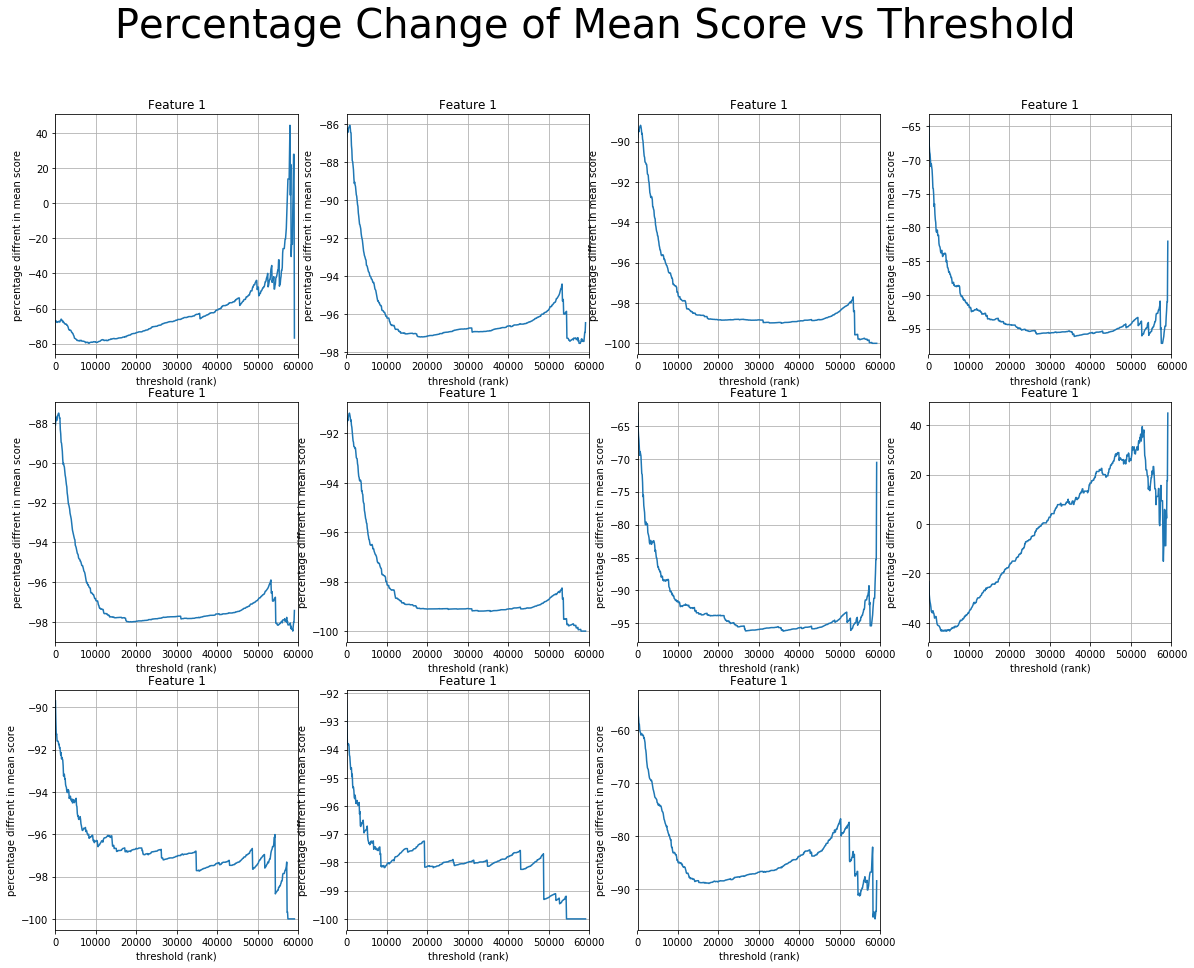

In [297]:
plt.figure(figsize=(20,15))

for i in range(len(feature_thres_comp)):
    plt.subplot(3,4,i+1)
    plt.plot(list(range(100, int(max(feature_rank['rank'])), 100)),feature_thres_comp[i])
    plt.xlim(100,60000)
    plt.xlabel('threshold (rank)')
    plt.ylabel('percentage diffrent in mean score')
    plt.title('Feature 1')
    plt.grid()

plt.suptitle('Percentage Change of Mean Score vs Threshold', fontsize=40)
plt.show()